<a href="https://colab.research.google.com/github/Chathuwa99/Bank-Deposit-Prediction-Project/blob/main/Bank_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Loading the data set
data_set = pd.read_csv('/content/cleaned_bank_dataset.csv')

In [3]:
# Displaying first 5 rows of the data set
data_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Displaying last 5 rows in the data set
data_set.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Information of the loaded data set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Calculating number of rows and columns in the data set
data_set.shape

(45211, 17)

In [7]:
# Displaying the Columns in the data set
print("All columns in the dataset:")
print(data_set.columns)

All columns in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [8]:
# Describing numerical columns in the data set
data_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Displaying unique values for each an every categorical column
Categorical_Columns = data_set.select_dtypes(include='object').columns

for Column in Categorical_Columns:
    print(f"Column Name: {Column}")
    print(f"Unique values: {data_set[Column].unique()}\n")


Column Name: job
Unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column Name: marital
Unique values: ['married' 'single' 'divorced']

Column Name: education
Unique values: ['tertiary' 'secondary' 'unknown' 'primary']

Column Name: default
Unique values: ['no' 'yes']

Column Name: housing
Unique values: ['yes' 'no']

Column Name: loan
Unique values: ['no' 'yes']

Column Name: contact
Unique values: ['unknown' 'cellular' 'telephone']

Column Name: month
Unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column Name: poutcome
Unique values: ['unknown' 'failure' 'other' 'success']

Column Name: y
Unique values: ['no' 'yes']



In [10]:
# Check for missing values in each column
print("Missing values in each column:")
print(data_set.isnull().sum())


Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [11]:
# List all categorical features
Categorical_Features = data_set.select_dtypes(include='object').columns
print("Categorical Features:")
print(Categorical_Features)


Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [12]:
# Value counts each categorical data

value_counts_dict = {}

for Column in data_set.columns:                                                  # Value count each categorical data by looping and save it in a dictionary
    if data_set[Column].dtype == 'object' or data_set[Column].dtype == 'category':
        value_counts_dict[Column] = data_set[Column].value_counts()

for Column, value_counts in value_counts_dict.items():                     # Print each categorical data by looping
    print(f"Value counts for column '{Column}':\n{value_counts}\n")

Value counts for column 'job':
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for column 'education':
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for column 'default':
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for column 'housing':
housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for column 'loan':
loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for column 'contact':
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

In [13]:
#Checking Unique values in each variable
data_set.nunique()

,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


# **Visualizing the Categorical Features**

# Distribution of job

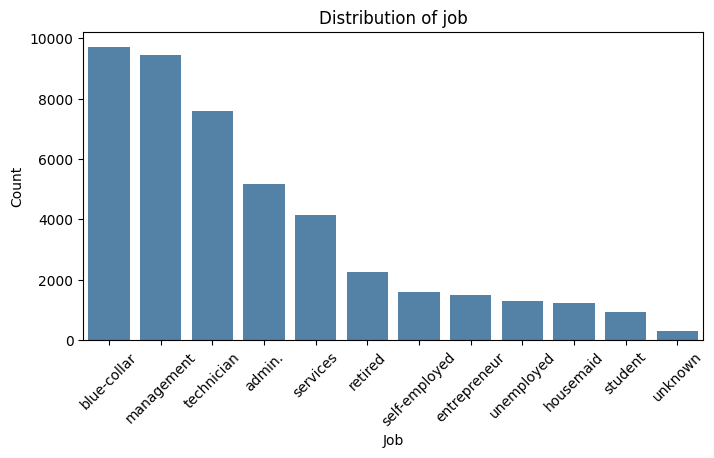

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_set, x='job', color="steelblue", order=data_set['job'].value_counts().index)
plt.title("Distribution of job")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Distribution of marital

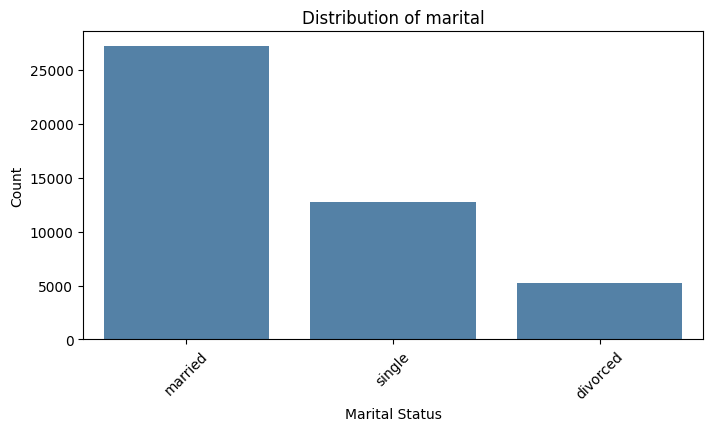

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_set, x='marital', color="steelblue", order=data_set['marital'].value_counts().index)
plt.title("Distribution of marital")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Distribution of education

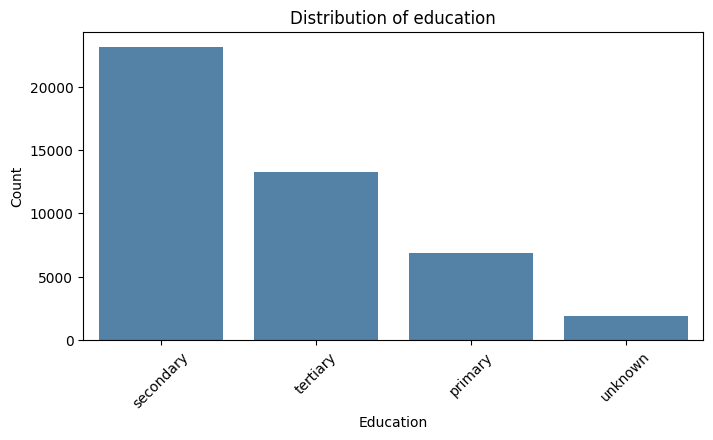

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_set, x='education', color="steelblue", order=data_set['education'].value_counts().index)
plt.title("Distribution of education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Distribution of contact

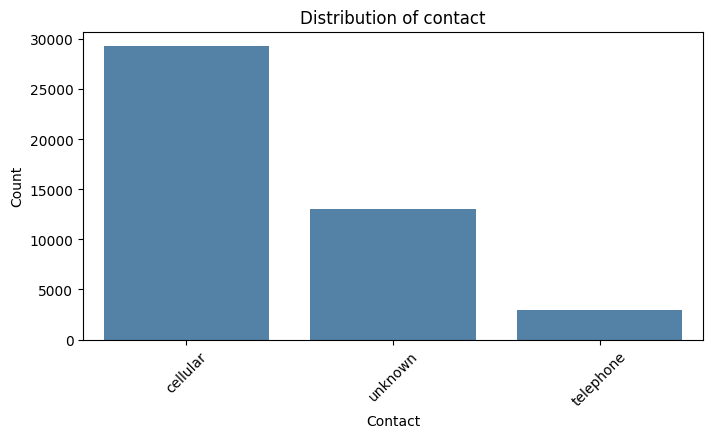

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_set, x='contact', color="steelblue", order=data_set['contact'].value_counts().index)
plt.title("Distribution of contact")
plt.xlabel("Contact")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Distribution of month

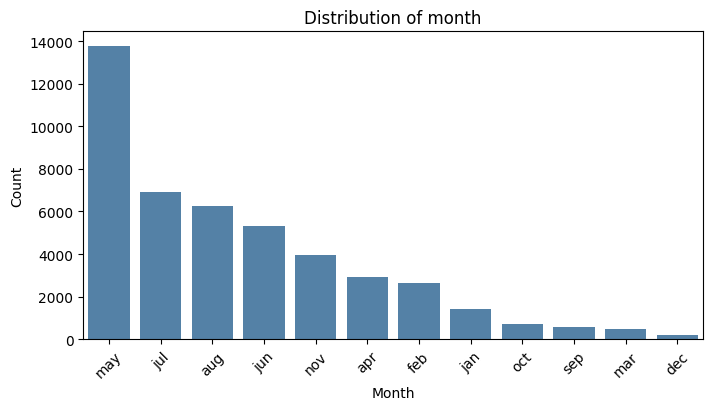

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_set, x='month', color="steelblue", order=data_set['month'].value_counts().index)
plt.title("Distribution of month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Distribution of poutcome

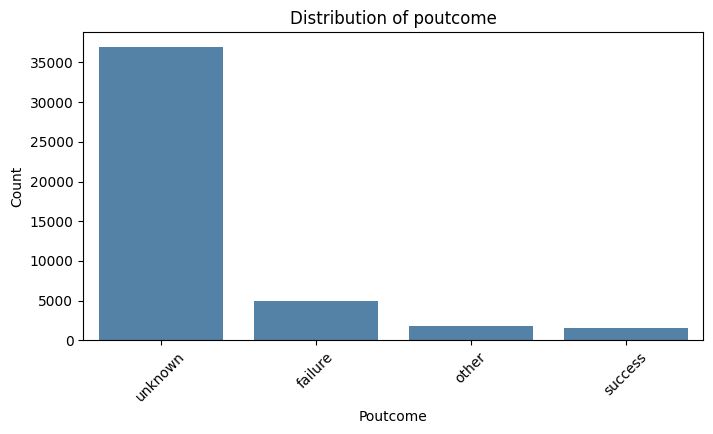

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_set, x='poutcome', color="steelblue", order=data_set['poutcome'].value_counts().index)
plt.title("Distribution of poutcome")
plt.xlabel("Poutcome")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Distribution of target feature y

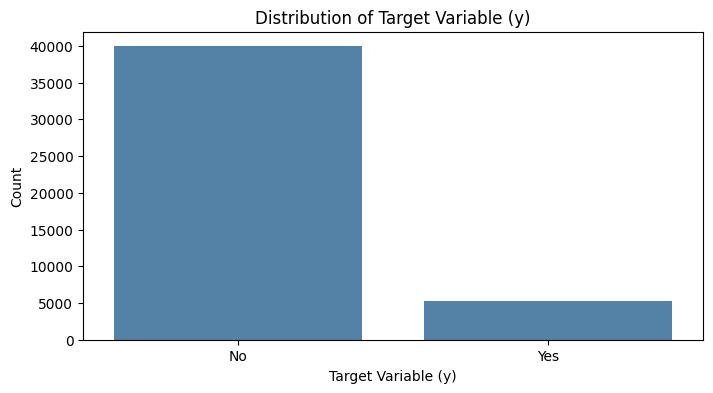

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data_set, x='y', color="steelblue", order=data_set['y'].value_counts().index)
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Target Variable (y)")
plt.ylabel("Count")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.show()


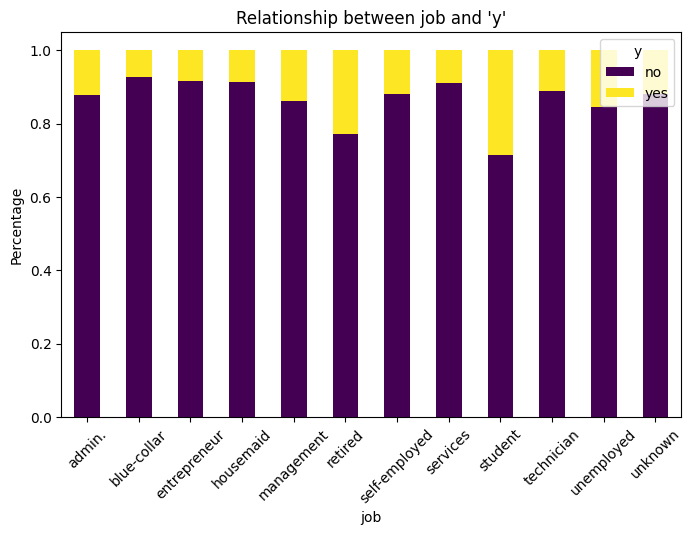

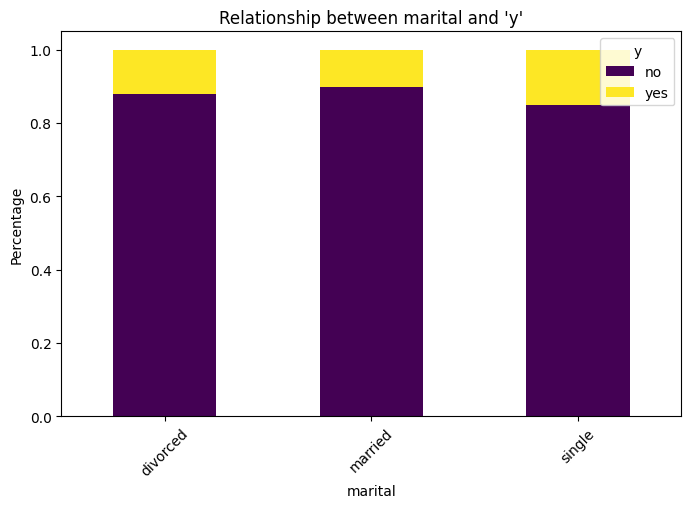

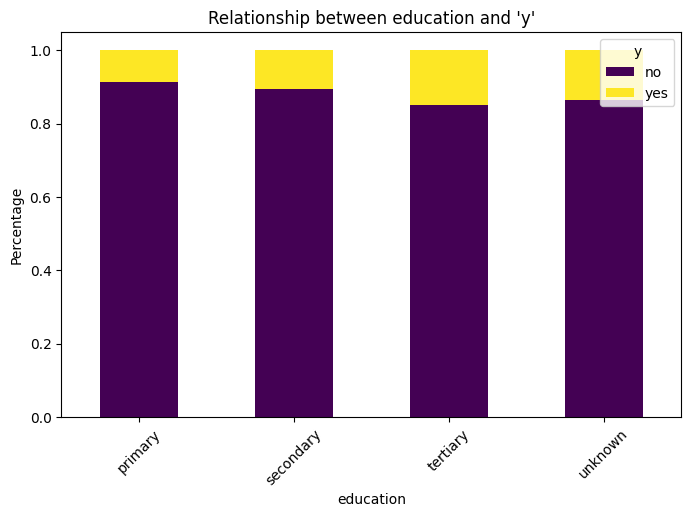

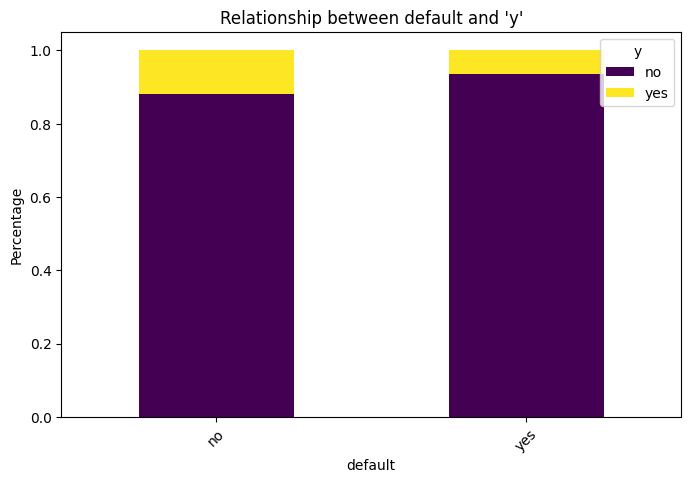

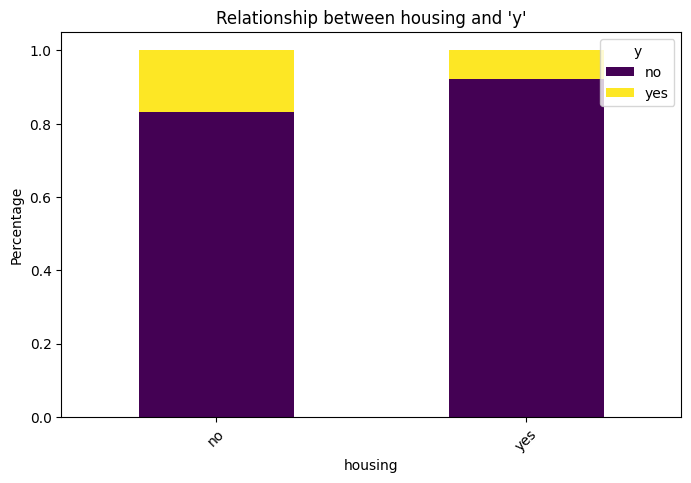

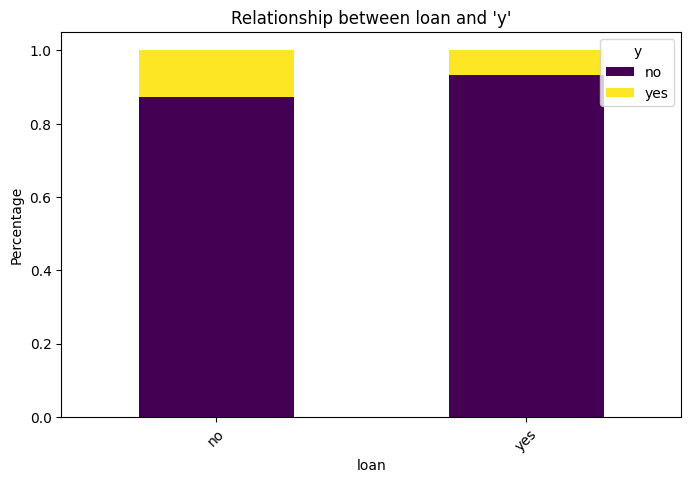

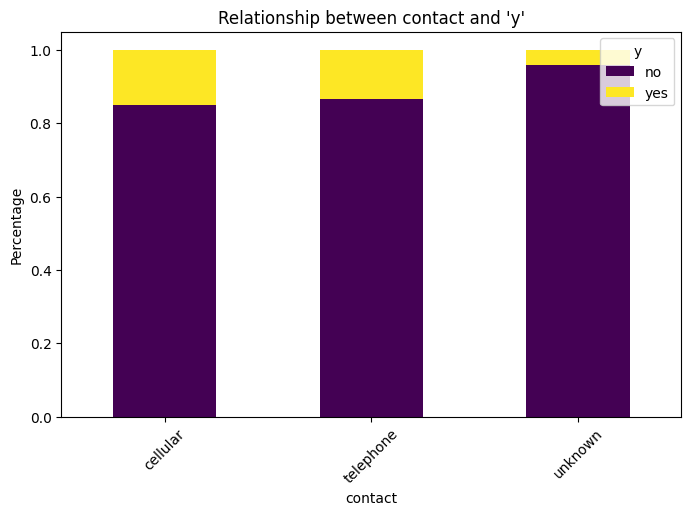

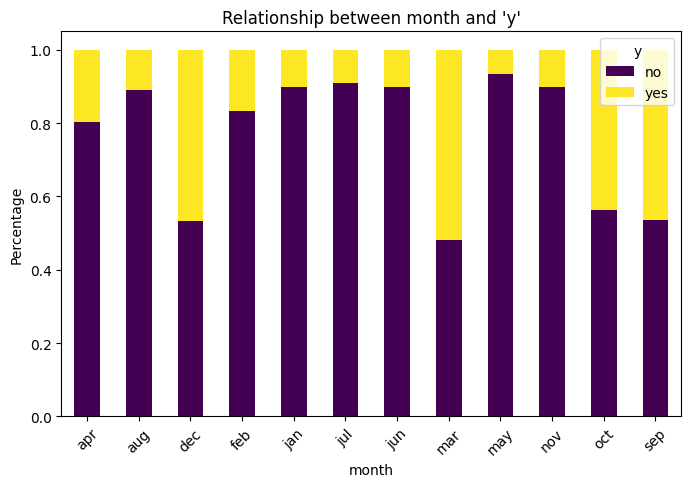

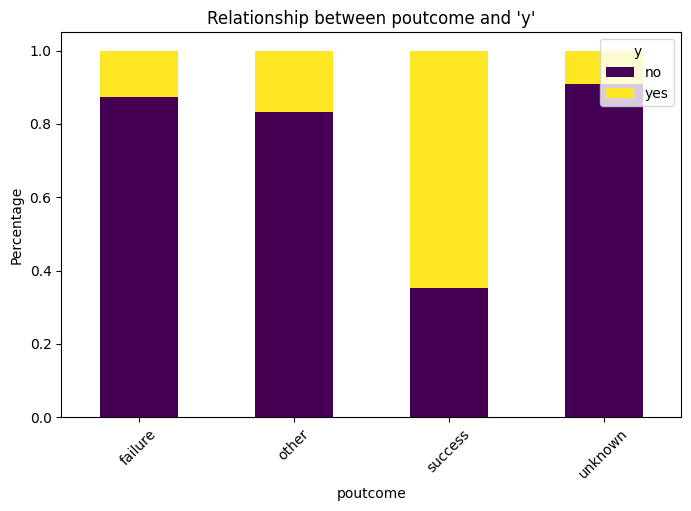

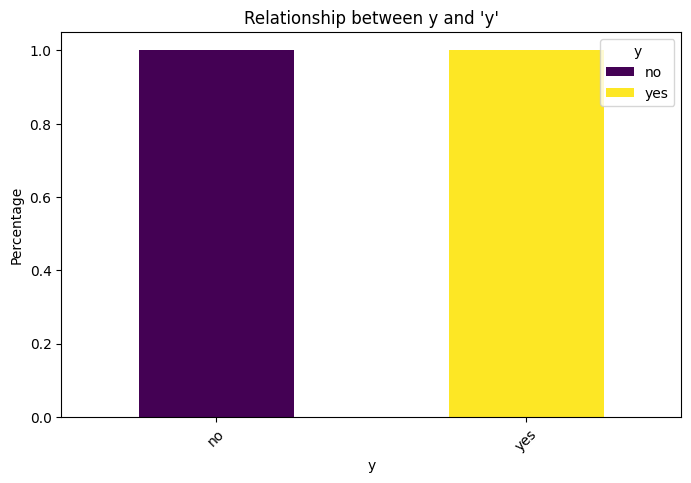

In [21]:
# Visualizing the relationship between categorical features and the target column 'y'

for Column in Categorical_Features:
    crosstab = pd.crosstab(data_set[Column], data_set['y'],normalize='index' )
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap="viridis")
    plt.title(f"Relationship between {Column} and 'y'")
    plt.xlabel(Column)
    plt.ylabel("Percentage")
    plt.legend(title='y', loc="upper right")
    plt.xticks(rotation=45)
    plt.show()


In [22]:
# Listing all numerical features
Numerical_Features = data_set.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:")

data_set[Numerical_Features].head()

Numerical Features:


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [23]:
# Identifing discrete numerical features (e.g., low unique values)
Discrete_Features = [col for col in Numerical_Features if data_set[col].nunique() < 20]
print("Discrete Numerical Features:", Discrete_Features)


Discrete Numerical Features: []


In [24]:
for col in Discrete_Features:
    print(f"\nRelationship between {col} and {'y'}:")
    print(data_set.groupby(col)['y'].mean())


In [25]:
# Continuous features have many unique values
Continuous_Features = [col for col in Numerical_Features if data_set[col].nunique() >= 20]
print("Continuous Numerical Features:", Continuous_Features)


Continuous Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


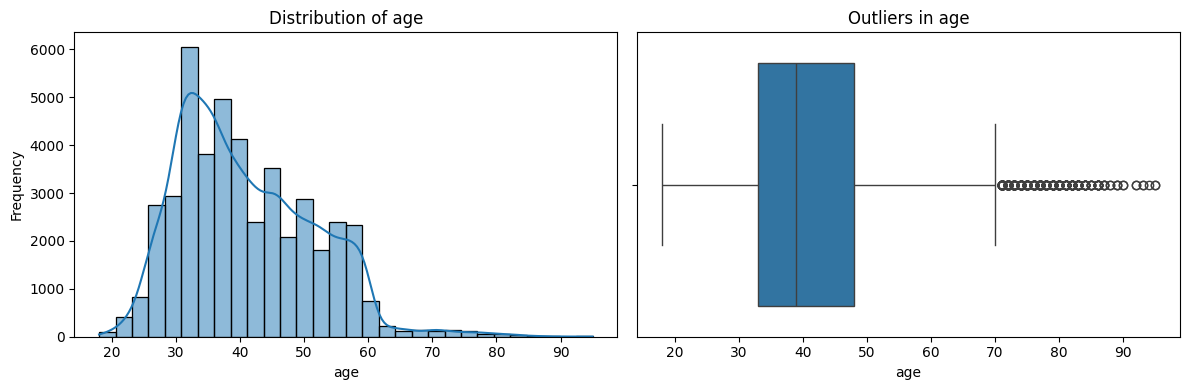

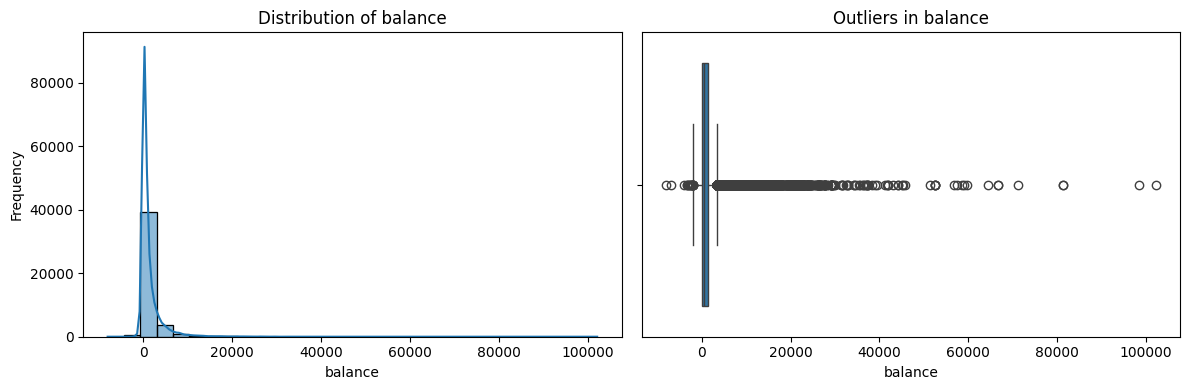

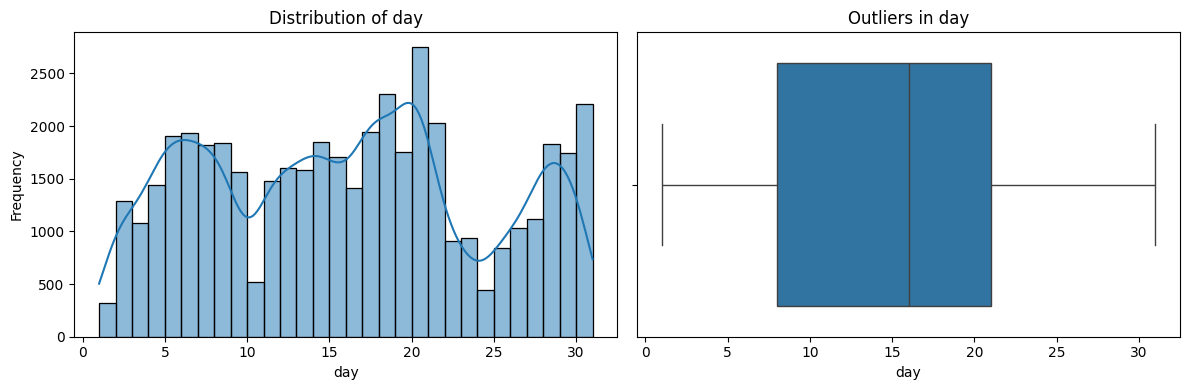

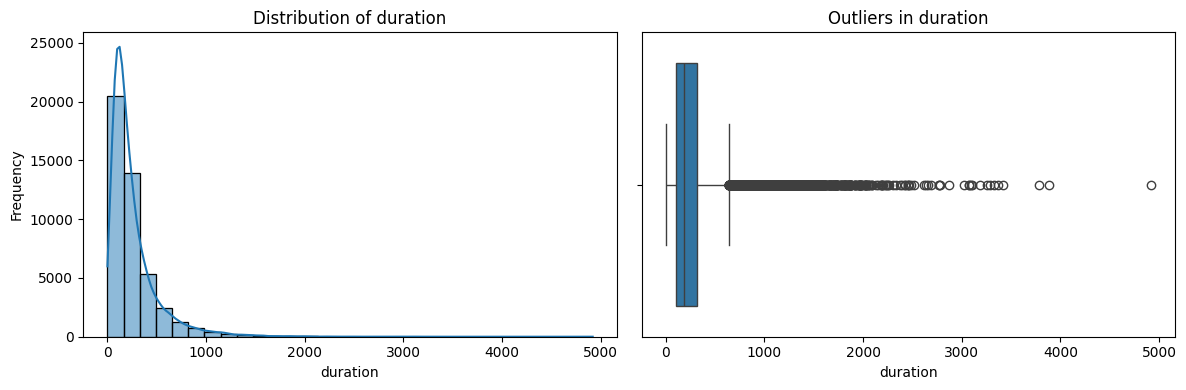

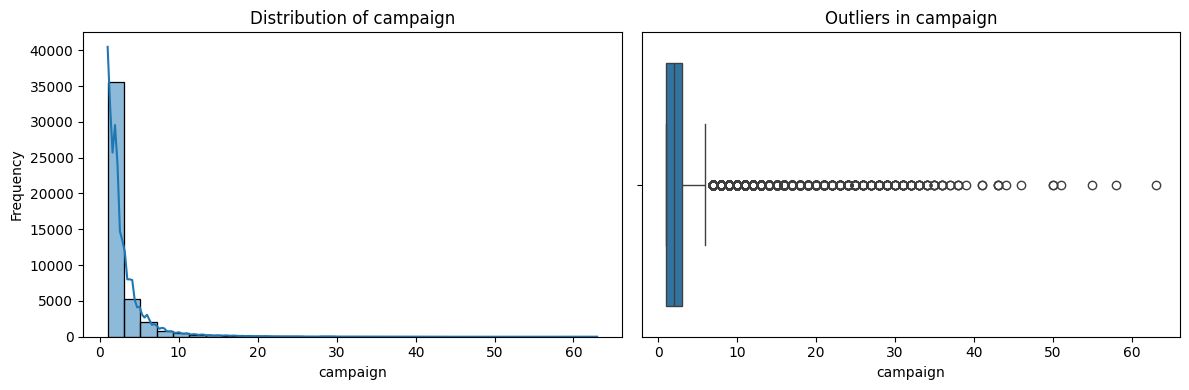

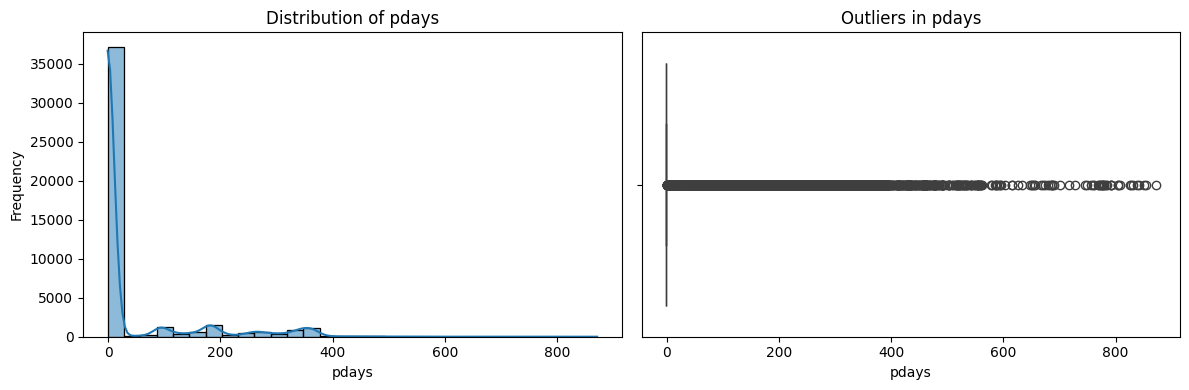

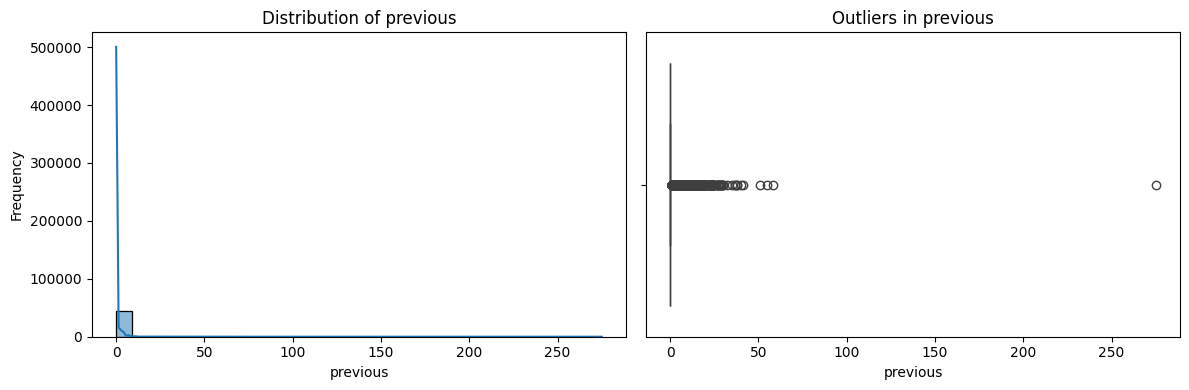

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through continuous features and numerical features
for col in Continuous_Features:  # Replace 'continuous_features' with your list of features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 1 row and 2 columns

    # Left plot: Histogram with KDE
    sns.histplot(data_set[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # Right plot: Boxplot
    sns.boxplot(x=data_set[col], ax=axes[1])
    axes[1].set_title(f"Outliers in {col}")
    axes[1].set_xlabel(col)

    # Show the plots
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()


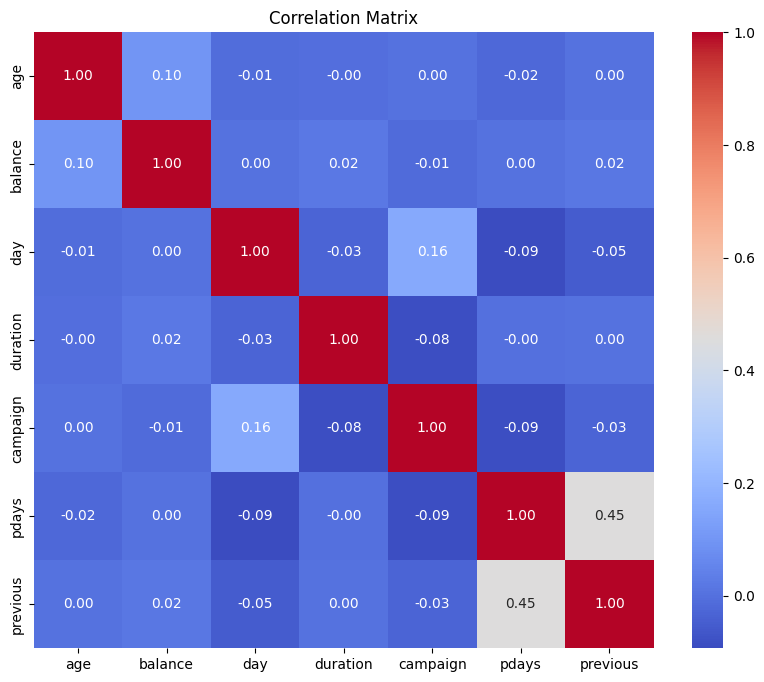

In [27]:
# Calculating correlation matrix
Correlation_Matrix = data_set[Numerical_Features].corr()

# Display correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Correlation_Matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


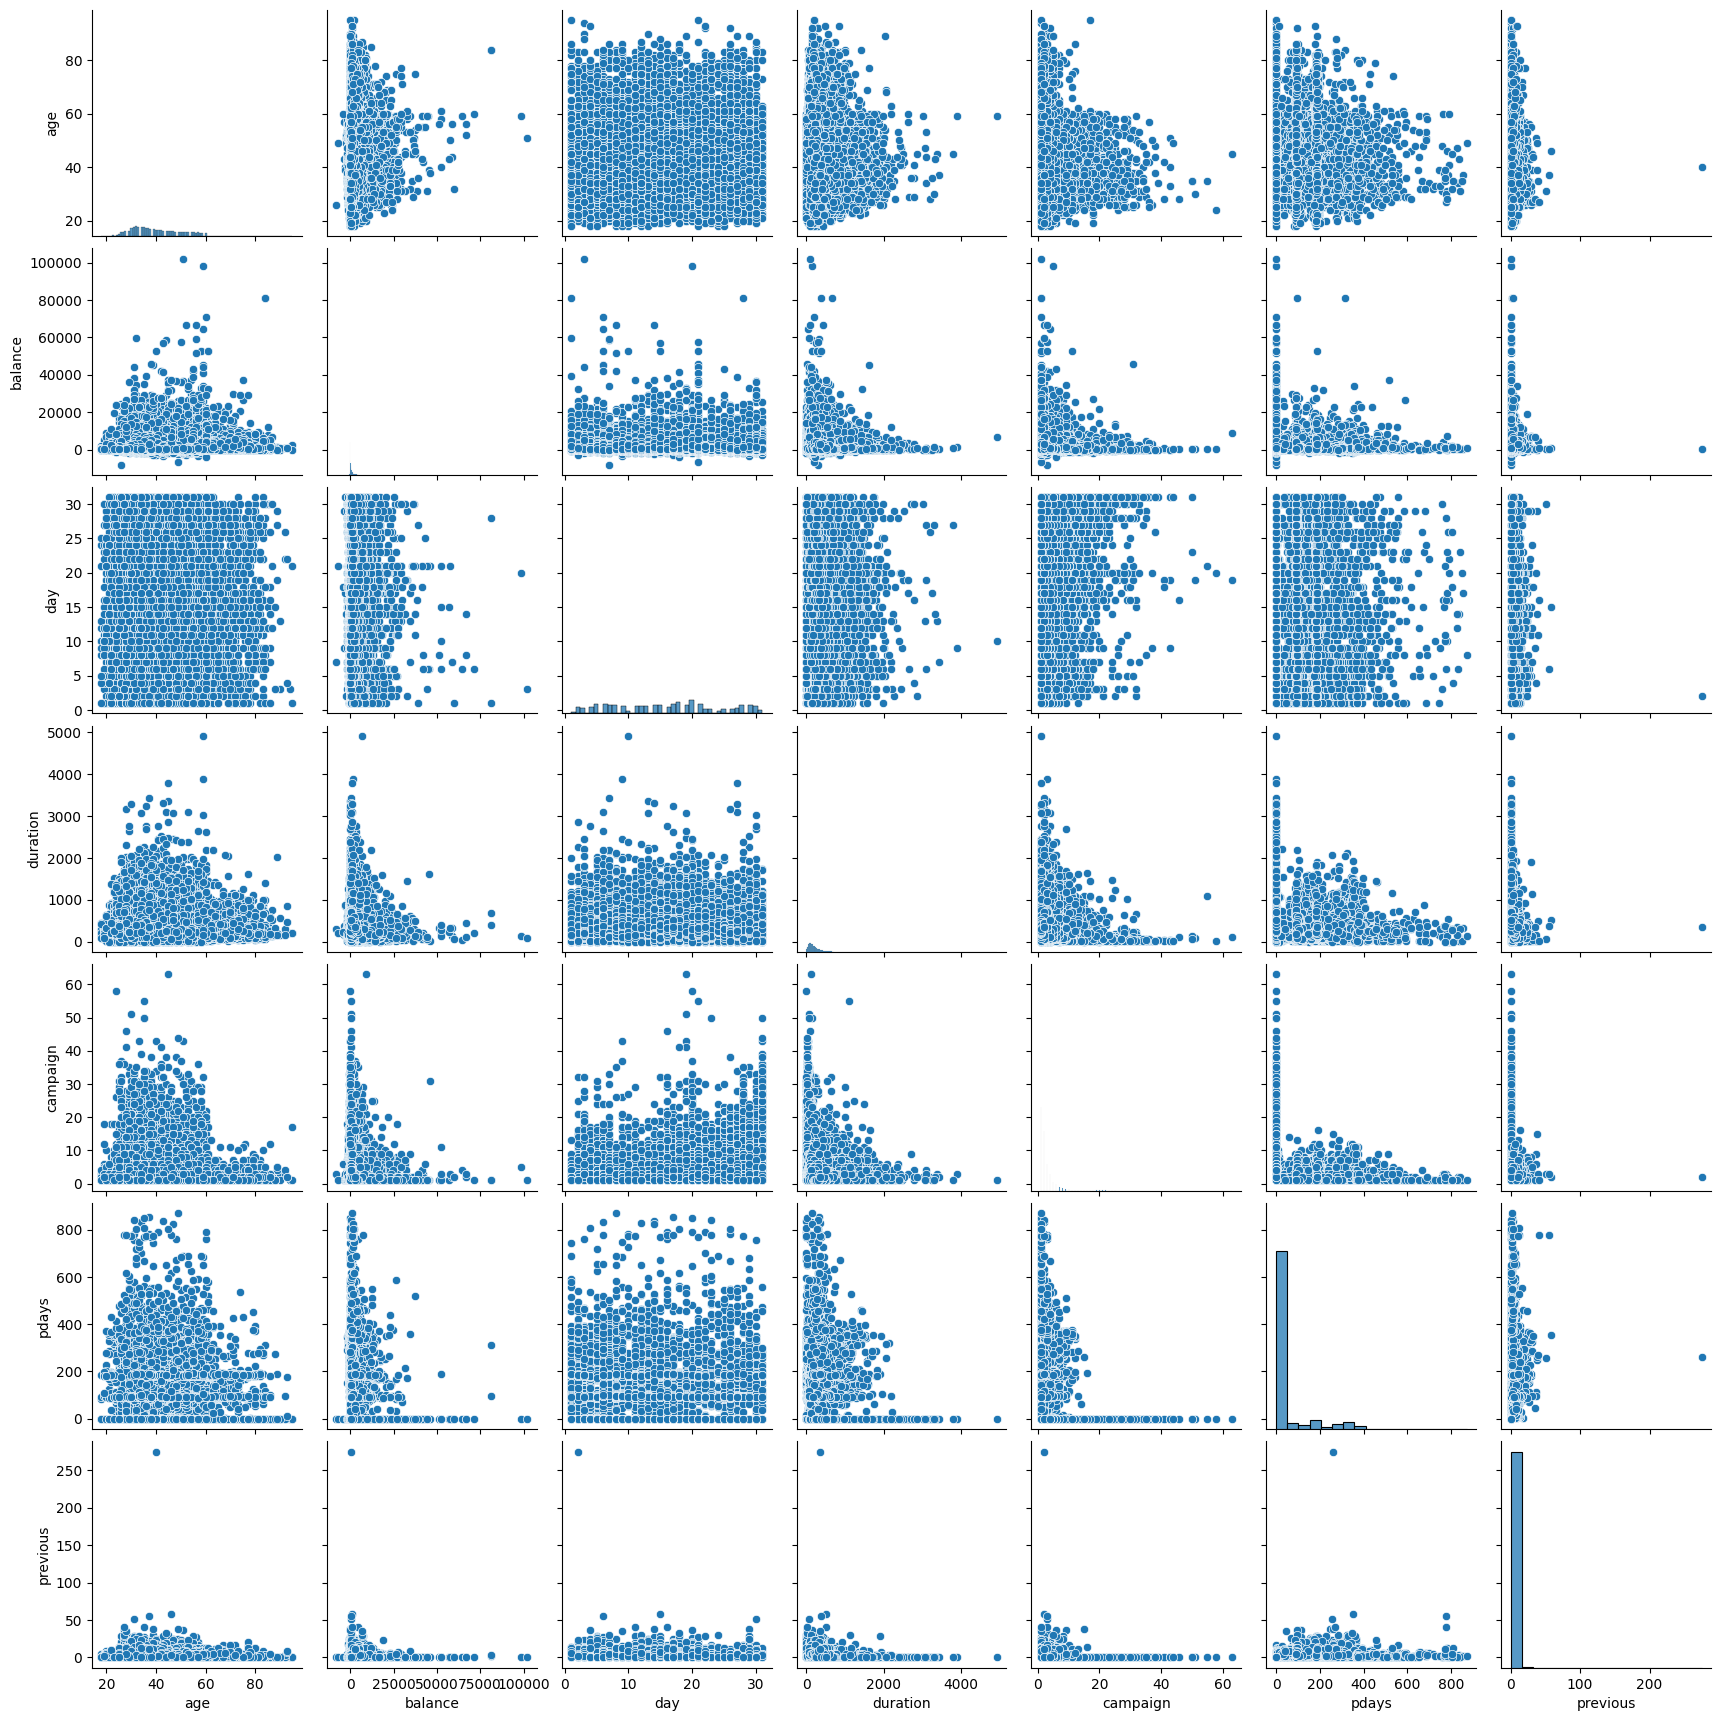

In [28]:
# Displaying pair plot for numerical features
sns.pairplot(data_set[Numerical_Features])
plt.show()
